<a href="https://colab.research.google.com/github/Zuzed22/Machine-Learning/blob/main/Ejercicios_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio 1

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este enlace.

- **1.** Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

- **2.** Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

- **3.** La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

- **4.** La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

### **Parte 1**

In [71]:
import pandas as pd

In [72]:
datos = pd.read_csv('/content/diabetes.csv')

In [73]:
datos

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [74]:
X = datos.drop(columns='diabetes', axis=1)
y = datos.diabetes

In [75]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

### **Parte 2**

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X,X_test,y,y_test = train_test_split(X, y, test_size= 0.05, stratify= y, random_state= 5)
X_train,X_val,y_train,y_val = train_test_split(X, y, stratify=y, random_state=5)

In [78]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9678571428571429
La exactitud del modelo con el conjunto de validación es de: 0.6276595744680851


### **Parte 3**

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [81]:
arbol.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {arbol.score(X_train, y_train)}')
print(f'Precisión de prueba: {arbol.score(X_val, y_val)}')

Precisión de entrenamiento: 0.7571428571428571
Precisión de prueba: 0.776595744680851


In [82]:
random_forest.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {random_forest.score(X_train, y_train)}')
print(f'Precisión de prueba: {random_forest.score(X_val, y_val)}')

Precisión de entrenamiento: 0.7321428571428571
Precisión de prueba: 0.7021276595744681


### **Parte 4**

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay

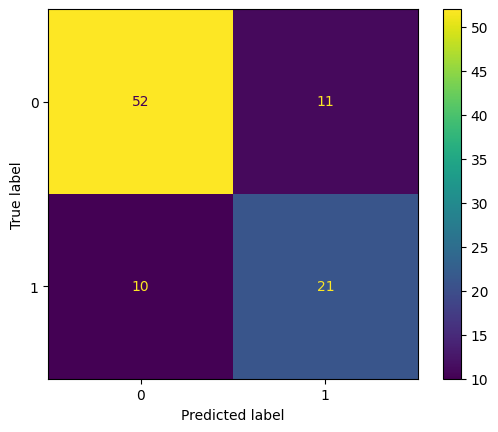

In [84]:
prediccion_arbol = arbol.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol);

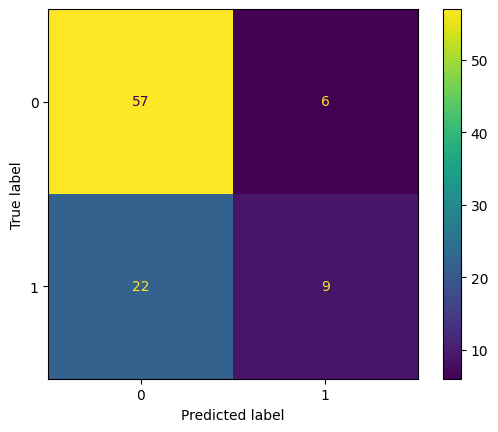

In [85]:
prediccion_rf = random_forest.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf);